In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import regression_utils as ru

from sklearn.linear_model import LinearRegression

In [2]:
dataframe = pd.read_csv("./Data/train.csv")
dataframe = dataframe[['LotArea', 'SalePrice']]
dataframe

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [3]:
def get_values(lot_areas: np.ndarray, sale_prices: np.ndarray, epochs: int, learning_rate: float):
    m = 0
    b = 0

    loss_values = []
    for _ in range(epochs):
        m, b, loss_value = ru.gradient_descent(m, b, lot_areas, sale_prices, learning_rate)
        loss_values.append(loss_value)

    return m, b, loss_values

In [4]:
def plot_loss(epochs: int, loss_values: np.ndarray):
    figure, loss = plt.subplots()
    figure.set_label("Loss")
    epoch_values = [x for x in range(epochs)]
    loss.plot(epoch_values, loss_values)

In [5]:
def get_my_predictions(lot_areas, sale_prices, epochs, learning_rate):
    m, b, loss_values = get_values(lot_areas, sale_prices, epochs, learning_rate)
    return np.array([m * lot_area + b for lot_area in lot_areas]), loss_values

In [6]:
def get_sk_predictions(lot_areas, sale_prices):
    return LinearRegression().fit(lot_areas, sale_prices).predict(lot_areas)

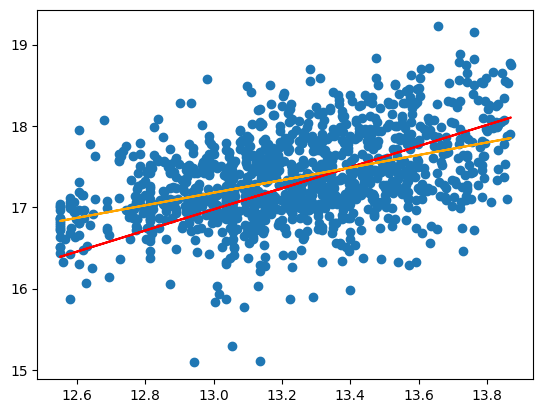

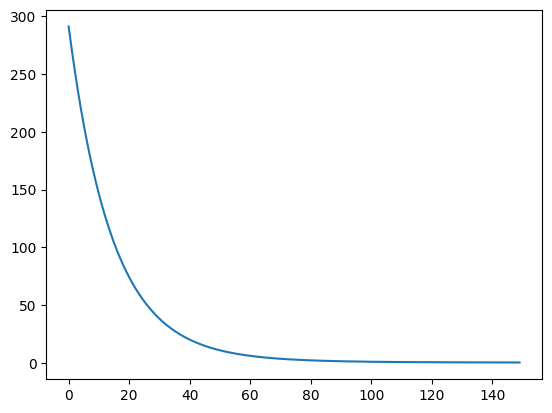

In [7]:
learning_rate = 0.0001
epochs = 150

np_df = dataframe.to_numpy()
lot_area, sale_price = np_df[:, :-1], np_df[:, -1]
scaled_lot_area, scaled_sale_price = np.log2(lot_area), np.log2(sale_price)

(scaled_features, scaled_sale_price) = ru.reject_outliers(scaled_lot_area, scaled_sale_price, 65, 35, 1.5)
scaled_lot_area, scaled_sale_price = np.array([feature_list[0] for _, feature_list in enumerate(scaled_features)]), np.array(scaled_sale_price)
my_predictions, loss_values = get_my_predictions(scaled_lot_area, scaled_sale_price, epochs, learning_rate)
sk_predictions = get_sk_predictions(scaled_lot_area.reshape(len(scaled_lot_area), -1), scaled_sale_price.reshape(len(scaled_sale_price), -1))

plt.scatter(scaled_lot_area, scaled_sale_price)
plt.plot(scaled_lot_area, my_predictions, color='red')
plt.plot(scaled_lot_area, sk_predictions, color='orange')

plot_loss(epochs, loss_values)

In [8]:
lot_areas = scaled_lot_area.tolist()
real_sale_prices = scaled_sale_price.tolist()
my_sale_price_predictions = my_predictions.tolist()
sklearn_sale_price_predictions = sk_predictions.flatten().tolist()

table = {
    'Lot Area': lot_areas,
    'Sale Price (My)': my_sale_price_predictions,
    'Sale Price (SK)': sklearn_sale_price_predictions,
    'Sale Price': real_sale_prices,
}

pd.DataFrame(table).sample(10)

,Lot Area,Sale Price (My),Sale Price (SK),Sale Price
1073,13.264736,17.316479,17.382451,17.528027
691,13.567956,17.710074,17.616712,17.021067
721,13.117156,17.124913,17.268435,16.999207
358,12.813781,16.731117,17.034055,17.241909
254,13.562600,17.703122,17.612574,18.433390
576,13.398744,17.490428,17.485983,17.449600
844,13.309476,17.374554,17.417017,17.042600
566,12.836445,16.760535,17.051565,17.569411
23,13.009479,16.985142,17.185246,17.232571
443,13.677389,17.852124,17.701257,17.121614
